# 10.3 Time Dependent Schrodinger equation in One dimension. Leapfrog method. 

In [1]:
# # # #  Program to illustrate solution of Time Dependent Schrodinger equation 
# # using leapfrog algorithm 
# #  based on 'Computational Physics' book by N Giordano and H Nakanishi 
# #  Section 10.5 # #  by Kevin Berwick   
# # #  


In [2]:
#using LinearAlgebra       #eigen()
using Plots
#using SparseArrays
#using Arpack              #for eigs()
gr()

Plots.GRBackend()

In [3]:
#  
# # Calculate the imaginary part of the wavefunction at time 
# t=t+delta_t/2,, t + 3*delta_t/2 etc 
# # given the value at time t.

#function [I_next]= imag_psi(N, I_current, R_current, delta_t, delta_x, V)  I_next= zeros(1,N); s=delta_t/(2*delta_x^2)
function imag_psi(N, I_current, R_current, delta_t, delta_x, V)
  
    I_next= zeros(N); s=delta_t/(2*delta_x^2);
    
    for x=2:N-1      
        # Calculate the imaginary part of the wavefunction at time t=t+delta_t,      
        # given the value at time t.         
        I_next[x]= I_current[x] +s*(R_current[x+1]-2*R_current[x]+R_current[x-1])-delta_t*V[x].*R_current[x];      
        
        # Boundary conditions                                                       
        I_next[1]=I_next[2];                            
        I_next[N]=I_next[N-1];                            
    end
    return I_next
end

imag_psi (generic function with 1 method)

In [4]:
#  
# # Calculate the real part of the wavefunction at time t=t+delta_t, 
# t+2*delta_t etc.... 
# # given the value at time t. Vectorise for speed.   

#function [R_next]= real_psi(N, R_current, I_current, delta_t, delta_x, V) 
function real_psi(N, R_current, I_current, delta_t, delta_x, V)
    
    R_next= zeros(N); s=delta_t/(2*delta_x^2); 
    
    for x=2:N-1      
        # Calculate the real part of the wavefunction at time t=t+delta_t,      
        # given the value at time t. Vectorise for speed.        
        R_next[x]=R_current[x] - s*(I_current[x+1]-2*I_current[x]+I_current[x-1])+delta_t*V[x].*I_current[x];        
    
        # Boundary conditions                               
        R_next[1]=R_next[2];                            
        R_next[N]=R_next[N-1];   
    end
    
    return R_next
end

real_psi (generic function with 1 method)

In [5]:
# #  Initialise and set up initial waveform
N=1000
x= collect(range(0, 1, length = N))

# Set up intial wavepacket
x_0=0.4
C=10
sigma_squared=1e-3
k_0=500

# Discretisation parameters   
delta_x=1e-3
delta_t=5e-8

5.0e-8

In [6]:
#  #  Generate an intial wavepacket #   

psi= @. C*exp(-(x-x_0)^2/sigma_squared)*exp(im*k_0*x)

# # # Extract the real and imaginary parts of the wavefunction  #  
R_initial=real(psi); I_initial=imag(psi);     

#  Build a potential cliff . Create a region with a cliff  at x=0.6. To the 
#  left, V=0, to the right,  V=-1e6.     

#V= zeros(1, N); V(600:N) =-1e6;
V = zeros(N)
for i = 600:N
    V[i] = -1e6
end


# Initialise current real and imaginary parts of psi    
I_current=I_initial;  R_current=R_initial; 

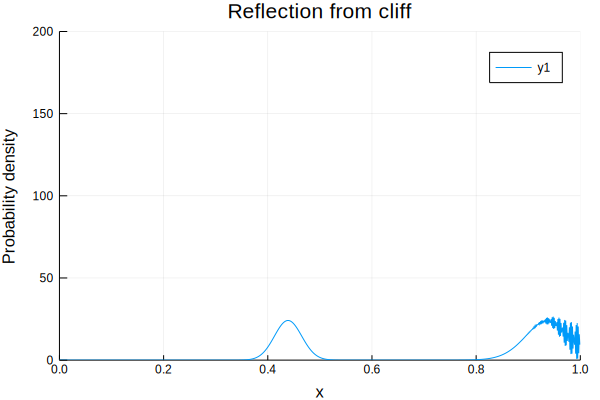

In [7]:
gr(show = :ijulia)

# Initial run of Im(psi) to start off leapfrog process;   
# t=t+delta_t/2;    
I_next = imag_psi(N, I_current, R_current, delta_t, delta_x, V);    


# # Do the leapfrog!! #   
for time_step = 1:15000;         
    # evaluate R at delta_t, 2*delta_t, 3*delta_t.......     
    #     Time is incremented by  t=t+delta_t/2 every call;           
    R_next=real_psi(N, R_current, I_current, delta_t, delta_x, V);            
    R_current=R_next;     
    
    # evaluate I at (3/2)*delta_t, (5/2)*delta_t............           
    # Time is incremented by  t=t+delta_t/2 every call;           
    I_next = imag_psi(N, I_current, R_current, delta_t, delta_x, V);            
    
    # calculate psi*psi  with R(t) and  I(t+delta_t/2) and I(t-delta_t/2)                  
    prob_density=R_current.^2+I_next.*I_current;        
    I_current=I_next;        

    
    # Visualise results with movie. Plot every 10 calculations for speed            
    if rem(time_step, 10)== 0                             
        #plot(x, prob_density);                 
        #title!("Reflection from cliff")
        #xaxis!("x", (0, 1))
        #yaxis!("Probability density", (0, 200))
        #xlabel!("x")
        #ylabel!("Probability density")
        #display(plot(p1,legend=false))
        plot(x, prob_density, title = "Reflection from cliff", xaxis = ("x", (0, 1)), yaxis = ("Probability density", (0, 200)));
                
    end
    
end

In [8]:
#plot(x, prob_density, title = "Reflection from cliff", xaxis = ("x", (0, 1)), yaxis!("Probability density", (0, 200)), leg=false);

In [9]:
#=
#subplot(121)
p1 = plot(x,real(psi), color = :blue)
title!("Real part of wavefunction ")
xlabel!("distance")
ylabel!("Re(wavefunction)")

p2 = plot(x,imag(psi), color = :red)
title!("Imaginary part of wavefunction");
xlabel!("distance");
ylabel!("Im(wavefunction)");  

p3 = plot(x,real((conj(psi).*psi)),color = :green)
title!("Probability of finding particle  ") 
xlabel!("distance") 
ylabel!("psi*conj(psi)")


plot(p1,p2,p3, layout=3,legend=false)
=#